<a href="https://colab.research.google.com/github/kirnapure/hotel-booking-analysis/blob/main/Trinity_AVI_%2Chotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hotel booking analysis 🙂**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.



#**Objective 👽**
This EDA capstone project aims to extract meaningful insights from hotel booking data to improve decision-making in the hospitality industry. We will analyze booking trends, cancellations, pricing strategies, and customer preferences to provide actionable recommendations for optimizing occupancy rates, revenue, and customer satisfaction. 😀

# **Methodology**

In this project, We used Python's most useful libraries like Pandas, Matplotlib, Seaborn etc. to examine, cleaning and to analyse the “Hotel Booking Analysis” dataset

In [63]:
# first step - let's import necessary tools/libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# lets import the dataset from drive
# from google.colab import drive
# drive.mount('/content/drive')

In [65]:
# alkesh -
df = pd.read_csv(r'/content/sample_data/Hotel Bookings (1).csv')

In [66]:
# let's upload the dataset
from google.colab import files
uploaded = files.upload()

In [67]:
# load the csv file
#df = pd.read_csv(r'/content/Hotel Bookings.csv')

In [68]:
# before cleaning the data total number of rows and columns in data
print(f"We have total {df.shape[0]} rows and {df.shape[1]} columns")

We have total 29264 rows and 32 columns


## **let's take a look at some rows and columns in the given dataset ✅**

In [69]:
# checking first 5 rows of data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [70]:
# checking last 5 rows of data
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29259,Resort Hotel,0,386,2016,October,43,20,1,3,2,...,No Deposit,NaN,NaN,0,Transient-Party,49.00,0,0,Check-Out,2016-10-24
29260,Resort Hotel,0,77,2016,October,43,17,2,5,2,...,No Deposit,NaN,NaN,0,Transient,10.00,0,0,Check-Out,2016-10-24
29261,Resort Hotel,0,134,2016,October,43,17,2,5,2,...,No Deposit,240.0,NaN,0,Transient,100.00,0,2,Check-Out,2016-10-24
29262,Resort Hotel,0,220,2016,October,43,17,2,5,2,...,No Deposit,243.0,NaN,0,Contract,72.75,0,0,Check-Out,2016-10-24
29263,Resort Hotel,0,189,2016,October,43,21,1,2,3,...,No Deposit,314.0,NaN,0,Transient,72.56,0,1,Check-Out,2016-10


## **Dataset**
This dataset contains information on records for client stays at hotels. More specifically, it contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the guest arecoming for first time, number of days in waiting list, among other things. For the purpose of this post, We only focused on some of these variables to examine.


In [71]:
# checking the basic information of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29264 non-null  object 
 1   is_canceled                     29264 non-null  int64  
 2   lead_time                       29264 non-null  int64  
 3   arrival_date_year               29264 non-null  int64  
 4   arrival_date_month              29264 non-null  object 
 5   arrival_date_week_number        29264 non-null  int64  
 6   arrival_date_day_of_month       29264 non-null  int64  
 7   stays_in_weekend_nights         29264 non-null  int64  
 8   stays_in_week_nights            29264 non-null  int64  
 9   adults                          29264 non-null  int64  
 10  children                        29264 non-null  int64  
 11  babies                          29264 non-null  int64  
 12  meal                            

✅ the .info() method provided by panda gives us information about the data types of each column, number of non-null values, and memory usage. ✅

In [72]:
# Investigating the summary statistics to understand the data's distribution.
# here we are rounding the decimal value at 2 for better understanding
df.describe().round(2)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,29264.00,23221.00,2351.00,29264.00,29264.00,29264.00,29264.00
mean,0.38,98.07,2015.88,28.17,15.72,1.20,3.16,1.88,0.13,0.01,0.05,0.14,0.19,0.26,214.38,224.10,0.60,95.12,0.12,0.56
std,0.49,99.54,0.66,13.36,8.85,1.14,2.45,0.77,0.46,0.12,0.22,1.56,1.15,0.69,84.04,114.95,7.91,60.68,0.34,0.78
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00
25%,0.00,13.00,2015.00,17.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,208.00,135.00,0.00,50.40,0.00,0.00
50%,0.00,65.00,2016.00,30.00,16.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,240.00,223.00,0.00,76.00,0.00,0.00
75%,1.00,163.00,2016.00,39.00,23.00,2.00,5.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,242.00,291.50,0.00,126.60,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.00,2.00,1.00,26.00,30.00,17.00,531.00,543.00,150.00,508.00,8.00,5.00


here we see 32 columns in the dataframe and some columns like 'adults', 'babies', 'agent' have null values ✅

In [73]:
df1 = df.copy()

by creating a copy of datframe we have advantages like -
1. to preserve original data
2. avoid unintended side effects
3. freely modify the data as per our wish

# **Let's work on columns 😍**

In [74]:
df1.columns    #  dataset columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

let's check unique values in **columns 🙂**

In [75]:
df1['hotel'].unique()

array(['Resort Hotel'], dtype=object)

In [76]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [77]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [78]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

In [79]:
df1['agent'].unique()   # here we can  see agent column has some null values

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

#**Data Cleaning 😉**
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:

1. Remove duplicate rows.
2. Handling missing values.
3. Convert columns to appropriate datatypes.
4. Adding important columns.

#**removing duplicate values using data wrangling**

In [80]:
df1.shape   # original shape of dataset

(29264, 32)

In [81]:
# let's get number of duplicate rows
df1[df1.duplicated()].shape

(5014, 32)

In [82]:
# let's drop the duplicate rows
df1.drop_duplicates(inplace = True)

In [83]:
df1.shape    # shape of the dataframe after removing duplicate rows

(24250, 32)

here, we can see that duplicates files has been removed from the dataset ✅

## ***Check for null values ✅***

here, we are checking for null values in the given dataset and sorting them in decending order so that we can easily understand which columns has how many null values !!!

In [84]:
# checking the total numbar of null values and find out and sum them up
null_count = df1.isnull().sum()
null_count_sorted = null_count.sort_values(ascending = False) [:6]

print(null_count_sorted)

company                   22367
agent                      4813
country                     443
hotel                         0
previous_cancellations        0
reservation_status            0
dtype: int64


here, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didn't book hotel via any agent or via any company. So in that case values can be null under these columns.

We will replace null values by 0 in these columns

In [85]:
# Null values are replaced using for loop and .fillna()

null_columns = ['company','agent','children']
for column in null_columns:
  df1[column].fillna(0, inplace = True)

In [86]:
# Null valyes in contry column is replced by others using .fillna()
df1['country'].fillna('others', inplace = True)

In [87]:
# after clearing the data total number of rows and columns in data
print(f' We have total {df1.shape[0]} rows and {df1.shape[1]} columns.')

 We have total 24250 rows and 32 columns.


### **here we can see that there is no any column with null value 😍**

In [88]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False) [:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

## **what do you know about dataset ? 🤔**
The given dataset is of Hotel Booking and we have to analyse and explore this dataset to discover important facrtors which affects the Hotel Booking. The above dataset has 119390 rows and 32 coulumns.The duplicate value count is 31994 rows and 32 columns. There are 4 columns in dataset which have missing valuse and those columns are company, agent, country and children. We have filled those missing values by using wrangling methods.

In [89]:
# List of categorical/object column
print(f"Categorical attributes are present as columns in the DataFrame: {df.select_dtypes(include=['object']).columns.tolist()}")

Categorical attributes are present as columns in the DataFrame: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [90]:
# List of numerical column
print(f"The DataFrame contains columns that hold numeric information.: {df.select_dtypes(include=['int','float']).columns.tolist()}")

The DataFrame contains columns that hold numeric information.: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## **let's find out the most popular months 😍**

## *There are some rows with total number of adults, children or babies equal to zero this means there is no any booking were made. So we can remove such rows.*



In [91]:
df1[(df1['adults'] + df1['children'] + df1['babies'] ==0 )].shape

(7, 32)

let's remove rows with total number of adults, children or babies equal to zero

In [92]:
df1.drop(df1[(df1['adults'] + df1['children'] + df1['babies'] ==0 )].index, inplace = True)    # rows have been dropped

## **Adding important columns 😍**

we are adding these columns so that we can have better understanding of the dataset ✅

In [93]:
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']   # creating a column of total stay

In [94]:
df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']    # creating column of total people

In [95]:
df1['total_bookings'] = df1['previous_cancellations'] + df1['previous_bookings_not_canceled']    # creating column of total bookings

# **The Insights we got till now 😍**

*   In the given dataframe, there were 31994 duplicate values. So those values were removed.


*   There were 4 columns which have missing values and the columns were 'company','agent','country','children'. The values from these columns are replaced by zero.

*   In dataframe added three columns tatal_stay, total_people and total_bookings


*  Three columns 'adults','children','babies' had valuen zero which means no booking has done here, so these columns were removed.










# **EDA - Exploratory Data Analysis**

In [96]:
# what are the most popular months
month_counts = df['arrival_date_month'].value_counts().sort_values()
month_counts

January      1220
November     1491
December     1710
February     2020
June         2063
March        2276
May          2418
April        2494
October      3089
September    3108
July         3535
August       3840
Name: arrival_date_month, dtype: int64

Text(0.5, 0, 'months')

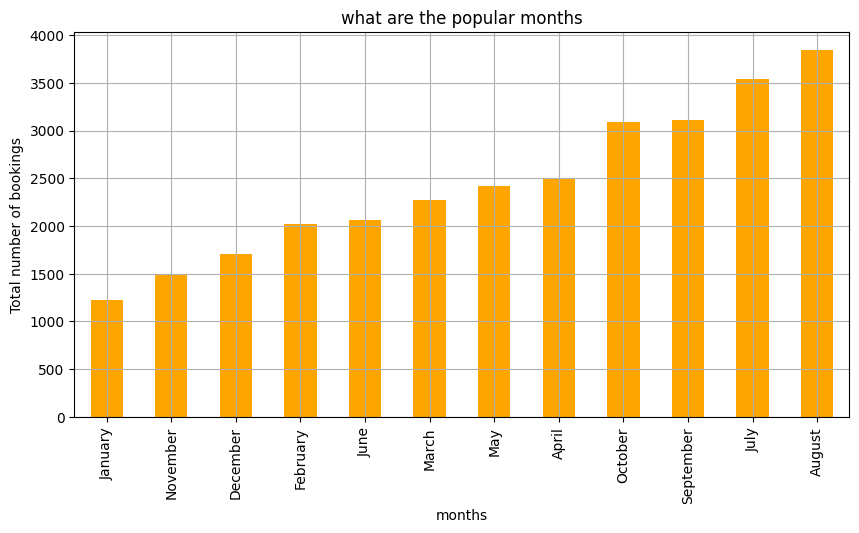

In [97]:
# we can have good insight of which are the popular months are by the graph.
month_counts.plot.bar(color='orange')
plt.rcParams['figure.figsize'] = (10,5)
plt.grid()
plt.title('what are the popular months')
plt.ylabel('Total number of bookings')
plt.xlabel( 'months')

As we can see that there are four popular months which are as follows:-  july,  august, september and october
